### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### UnitedKingdom

In [2]:
UnitedKingdom_dataset = pd.read_excel('UnitedKingdom_Dataset.xlsx')

In [3]:
UnitedKingdom_dataset.head(20)

,Country or region,Country code,ds,Bioenergy_yhat,Coal_yhat,Gas_yhat,Hydro_yhat,Solar_yhat,Wind_yhat,Emission
0,United Kingdom,GBR,2000-01-01,3.94,119.95,148.08,5.09,0.00,0.95,483.199
1,United Kingdom,GBR,2001-01-01,4.53,131.46,141.90,4.06,0.00,0.97,486.728
2,United Kingdom,GBR,2002-01-01,5.08,124.28,152.28,4.79,0.00,1.26,481.565
3,United Kingdom,GBR,2003-01-01,6.10,138.30,148.88,3.23,0.00,1.29,493.577
4,United Kingdom,GBR,2004-01-01,7.36,131.79,157.07,4.84,0.00,1.94,494.825
5,United Kingdom,GBR,2005-01-01,9.10,134.64,152.64,4.92,0.01,2.90,493.450
6,United Kingdom,GBR,2006-01-01,9.28,148.85,140.83,4.59,0.01,4.23,511.920
7,United Kingdom,GBR,2007-01-01,9.33,135.95,165.79,5.08,0.01,5.27,513.436
8,United Kingdom,GBR,2008-01-01,9.57,124.38,176.22,5.14,0.02,7.12,515.279
9,United Kingdom,GBR,2009-01-01,10.72,103.04,166.50,5.23,0.02,9.28,471.856


In [4]:
#Remove a column in the dataset
UnitedKingdom_dataset = UnitedKingdom_dataset.drop(['Emission'], axis=1)

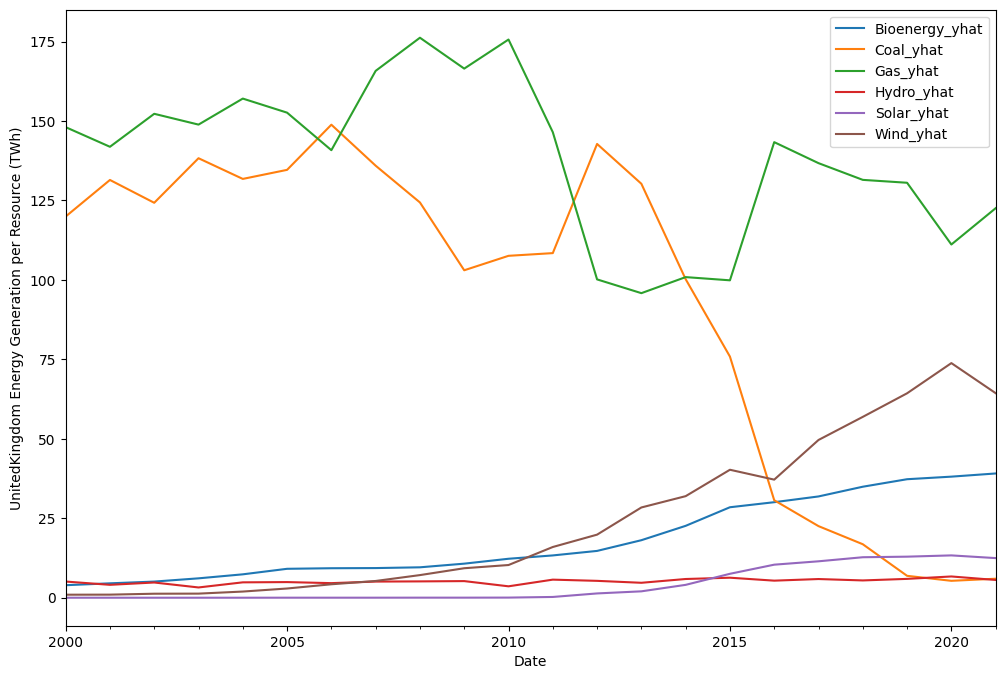

In [5]:
ax = UnitedKingdom_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('UnitedKingdom Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

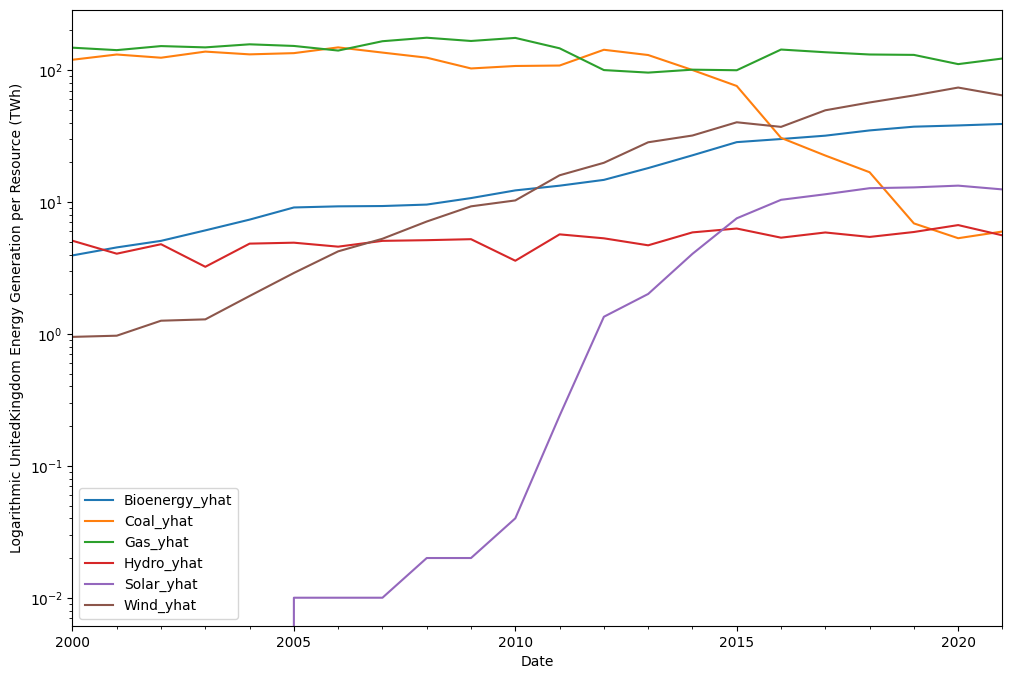

In [6]:
# Make y-axis in log scale
ax = UnitedKingdom_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic UnitedKingdom Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### UnitedKingdom's bioenergy

In [7]:
UnitedKingdom_BioenergyModel = Prophet()

##### Model Validation


In [8]:
UnitedKingdom_BioenergyValidationModel = Prophet()
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})

# Take just the first 15 rows for training
dataset_bioenergy_validation = dataset_bioenergy[:15]
UnitedKingdom_BioenergyValidationModel.fit(dataset_bioenergy_validation)
future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = UnitedKingdom_BioenergyValidationModel.predict(future_validation)

17:43:18 - cmdstanpy - INFO - Chain [1] start processing
17:43:18 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
datasetX = dataset_bioenergy[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 158.803
Root Mean Squared Error: 12.602
Mean Absolute Percentage Error: nan


#### Model Training


In [10]:
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})
UnitedKingdom_BioenergyModel.fit(dataset_bioenergy)

17:43:18 - cmdstanpy - INFO - Chain [1] start processing
17:43:19 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_years = pd.date_range(start='2022', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = UnitedKingdom_BioenergyModel.predict(future)

In [12]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedKingdom_Bioenergy = pd.concat([dataset_bioenergy, forecasted_values], ignore_index=True)
UnitedKingdom_Bioenergy = UnitedKingdom_Bioenergy.rename(columns={'ds': 'ds', 'y': 'Bioenergy_yhat'})
UnitedKingdom_Bioenergy.head(51)

,ds,Bioenergy_yhat
0,2000-01-01,3.940000
1,2001-01-01,4.530000
2,2002-01-01,5.080000
3,2003-01-01,6.100000
4,2004-01-01,7.360000
5,2005-01-01,9.100000
6,2006-01-01,9.280000
7,2007-01-01,9.330000
8,2008-01-01,9.570000
9,2009-01-01,10.720000


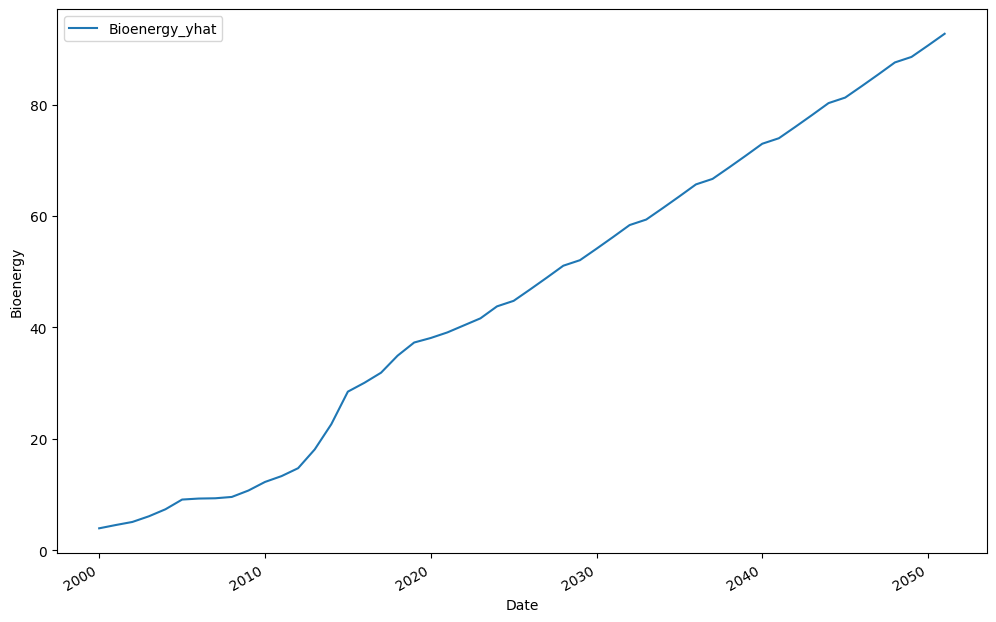

In [13]:
ax = UnitedKingdom_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bioenergy')
ax.set_xlabel('Date')
plt.show()

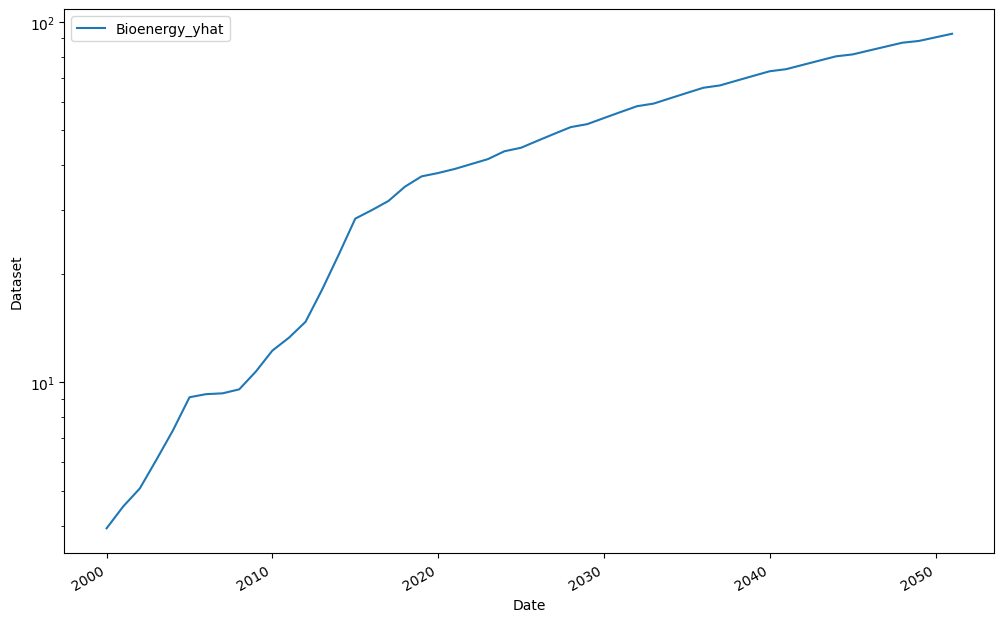

In [14]:
# Make y-axis in log scale
ax = UnitedKingdom_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### UnitedKingdom Coal Model

In [15]:
UnitedKingdom_CoalModel = Prophet()

UnitedKingdom_CoalValidationModel = Prophet()
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})

# Take just the first 15 rows for training
dataset_CoalValidation = dataset_Coal[:15]
UnitedKingdom_CoalValidationModel.fit(dataset_CoalValidation)
Coal_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Coal_future_validation = pd.DataFrame({'ds': Coal_future_years_validation})
Coal_forecast_validation = UnitedKingdom_CoalValidationModel.predict(Coal_future_validation)

CoaldatasetX = dataset_Coal[15:]
Coal_forecast_validation = Coal_forecast_validation[['ds', 'yhat']]

CoalPred = Coal_forecast_validation['yhat']
CoalCorrec = CoaldatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(CoalCorrec, CoalPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(CoalCorrec, CoalPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((CoalCorrec - CoalPred) / CoalCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:21 - cmdstanpy - INFO - Chain [1] start processing
17:43:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 9916.362
Root Mean Squared Error: 99.581
Mean Absolute Percentage Error: nan


In [16]:
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})
UnitedKingdom_CoalModel.fit(dataset_Coal)

CoalFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
CoalFuture = pd.DataFrame({'ds': CoalFuture_years})
CoalForecast = UnitedKingdom_CoalModel.predict(CoalFuture)
columns_to_load = ['ds', 'yhat']
CoalForecasted_values = CoalForecast.loc[:, columns_to_load]
CoalForecasted_values = CoalForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedKingdom_Coal = pd.concat([dataset_Coal, CoalForecasted_values], ignore_index=True)
UnitedKingdom_Coal = UnitedKingdom_Coal.rename(columns={'ds': 'ds', 'y': 'Coal_yhat'})


17:43:21 - cmdstanpy - INFO - Chain [1] start processing
17:43:21 - cmdstanpy - INFO - Chain [1] done processing


In [17]:


UnitedKingdom_Coal.head(51)

,ds,Coal_yhat
0,2000-01-01,119.950000
1,2001-01-01,131.460000
2,2002-01-01,124.280000
3,2003-01-01,138.300000
4,2004-01-01,131.790000
5,2005-01-01,134.640000
6,2006-01-01,148.850000
7,2007-01-01,135.950000
8,2008-01-01,124.380000
9,2009-01-01,103.040000


#### UnitedKingdom Gas 


In [18]:
UnitedKingdom_GasModel = Prophet()

UnitedKingdom_GasValidationModel = Prophet()
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})

# Take just the first 15 rows for training
dataset_GasValidation = dataset_Gas[:15]
UnitedKingdom_GasValidationModel.fit(dataset_GasValidation)
Gas_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Gas_future_validation = pd.DataFrame({'ds': Gas_future_years_validation})
Gas_forecast_validation = UnitedKingdom_GasValidationModel.predict(Gas_future_validation)

GasdatasetX = dataset_Gas[15:]
Gas_forecast_validation = Gas_forecast_validation[['ds', 'yhat']]

GasPred = Gas_forecast_validation['yhat']
GasCorrec = GasdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(GasCorrec, GasPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(GasCorrec, GasPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((GasCorrec - GasPred) / GasCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:22 - cmdstanpy - INFO - Chain [1] start processing
17:43:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 343.936
Root Mean Squared Error: 18.546
Mean Absolute Percentage Error: nan


In [19]:
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})
UnitedKingdom_GasModel.fit(dataset_Gas)

GasFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
GasFuture = pd.DataFrame({'ds': GasFuture_years})
GasForecast = UnitedKingdom_GasModel.predict(GasFuture)
columns_to_load = ['ds', 'yhat']
GasForecasted_values = GasForecast.loc[:, columns_to_load]
GasForecasted_values = GasForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedKingdom_Gas = pd.concat([dataset_Gas, GasForecasted_values], ignore_index=True)
UnitedKingdom_Gas = UnitedKingdom_Gas.rename(columns={'ds': 'ds', 'y': 'Gas_yhat'})

17:43:22 - cmdstanpy - INFO - Chain [1] start processing
17:43:22 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
UnitedKingdom_Gas.head(51)

,ds,Gas_yhat
0,2000-01-01,148.080000
1,2001-01-01,141.900000
2,2002-01-01,152.280000
3,2003-01-01,148.880000
4,2004-01-01,157.070000
5,2005-01-01,152.640000
6,2006-01-01,140.830000
7,2007-01-01,165.790000
8,2008-01-01,176.220000
9,2009-01-01,166.500000


#### UnitedKingdom Hydro

In [21]:
UnitedKingdom_HydroModel = Prophet()

UnitedKingdom_HydroValidationModel = Prophet()
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})

# Take just the first 15 rows for training
dataset_HydroValidation = dataset_Hydro[:15]
UnitedKingdom_HydroValidationModel.fit(dataset_HydroValidation)
Hydro_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Hydro_future_validation = pd.DataFrame({'ds': Hydro_future_years_validation})
Hydro_forecast_validation = UnitedKingdom_HydroValidationModel.predict(Hydro_future_validation)

HydrodatasetX = dataset_Hydro[15:]
Hydro_forecast_validation = Hydro_forecast_validation[['ds', 'yhat']]

HydroPred = Hydro_forecast_validation['yhat']
HydroCorrec = HydrodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(HydroCorrec, HydroPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(HydroCorrec, HydroPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((HydroCorrec - HydroPred) / HydroCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:23 - cmdstanpy - INFO - Chain [1] start processing
17:43:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.609
Root Mean Squared Error: 0.780
Mean Absolute Percentage Error: nan


In [22]:
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})
UnitedKingdom_HydroModel.fit(dataset_Hydro)

HydroFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
HydroFuture = pd.DataFrame({'ds': HydroFuture_years})
HydroForecast = UnitedKingdom_HydroModel.predict(HydroFuture)
columns_to_load = ['ds', 'yhat']
HydroForecasted_values = HydroForecast.loc[:, columns_to_load]
HydroForecasted_values = HydroForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedKingdom_Hydro = pd.concat([dataset_Hydro, HydroForecasted_values], ignore_index=True)
UnitedKingdom_Hydro = UnitedKingdom_Hydro.rename(columns={'ds': 'ds', 'y': 'Hydro_yhat'})

17:43:23 - cmdstanpy - INFO - Chain [1] start processing
17:43:24 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
UnitedKingdom_Hydro.head(51)

,ds,Hydro_yhat
0,2000-01-01,5.090000
1,2001-01-01,4.060000
2,2002-01-01,4.790000
3,2003-01-01,3.230000
4,2004-01-01,4.840000
5,2005-01-01,4.920000
6,2006-01-01,4.590000
7,2007-01-01,5.080000
8,2008-01-01,5.140000
9,2009-01-01,5.230000


#### UnitedKingdom Solar

In [24]:
UnitedKingdom_SolarModel = Prophet()

UnitedKingdom_SolarValidationModel = Prophet()
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SolarValidation = dataset_Solar[:15]
UnitedKingdom_SolarValidationModel.fit(dataset_SolarValidation)
Solar_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Solar_future_validation = pd.DataFrame({'ds': Solar_future_years_validation})
Solar_forecast_validation = UnitedKingdom_SolarValidationModel.predict(Solar_future_validation)

SolardatasetX = dataset_Solar[15:]
Solar_forecast_validation = Solar_forecast_validation[['ds', 'yhat']]

SolarPred = Solar_forecast_validation['yhat']
SolarCorrec = SolardatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SolarCorrec, SolarPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SolarCorrec, SolarPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SolarCorrec - SolarPred) / SolarCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:25 - cmdstanpy - INFO - Chain [1] start processing
17:43:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 87.985
Root Mean Squared Error: 9.380
Mean Absolute Percentage Error: nan


In [25]:
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})
UnitedKingdom_SolarModel.fit(dataset_Solar)

SolarFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
SolarFuture = pd.DataFrame({'ds': SolarFuture_years})
SolarForecast = UnitedKingdom_SolarModel.predict(SolarFuture)
columns_to_load = ['ds', 'yhat']
SolarForecasted_values = SolarForecast.loc[:, columns_to_load]
SolarForecasted_values = SolarForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedKingdom_Solar = pd.concat([dataset_Solar, SolarForecasted_values], ignore_index=True)
UnitedKingdom_Solar = UnitedKingdom_Solar.rename(columns={'ds': 'ds', 'y': 'Solar_yhat'})

17:43:25 - cmdstanpy - INFO - Chain [1] start processing
17:43:26 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
UnitedKingdom_Solar.head(51)

,ds,Solar_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.000000
3,2003-01-01,0.000000
4,2004-01-01,0.000000
5,2005-01-01,0.010000
6,2006-01-01,0.010000
7,2007-01-01,0.010000
8,2008-01-01,0.020000
9,2009-01-01,0.020000


#### UnitedKingdom Wind

In [27]:
UnitedKingdom_WindModel = Prophet()

UnitedKingdom_WindValidationModel = Prophet()
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})

# Take just the first 15 rows for training
dataset_WindValidation = dataset_Wind[:15]
UnitedKingdom_WindValidationModel.fit(dataset_WindValidation)
Wind_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Wind_future_validation = pd.DataFrame({'ds': Wind_future_years_validation})
Wind_forecast_validation = UnitedKingdom_WindValidationModel.predict(Wind_future_validation)

WinddatasetX = dataset_Wind[15:]
Wind_forecast_validation = Wind_forecast_validation[['ds', 'yhat']]

WindPred = Wind_forecast_validation['yhat']
WindCorrec = WinddatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(WindCorrec, WindPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(WindCorrec, WindPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((WindCorrec - WindPred) / WindCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:43:26 - cmdstanpy - INFO - Chain [1] start processing
17:43:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 585.031
Root Mean Squared Error: 24.187
Mean Absolute Percentage Error: nan


In [28]:
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('UnitedKingdom_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})
UnitedKingdom_WindModel.fit(dataset_Wind)

WindFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
WindFuture = pd.DataFrame({'ds': WindFuture_years})
WindForecast = UnitedKingdom_WindModel.predict(WindFuture)
columns_to_load = ['ds', 'yhat']
WindForecasted_values = WindForecast.loc[:, columns_to_load]
WindForecasted_values = WindForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedKingdom_Wind = pd.concat([dataset_Wind, WindForecasted_values], ignore_index=True)
UnitedKingdom_Wind = UnitedKingdom_Wind.rename(columns={'ds': 'ds', 'y': 'Wind_yhat'})

17:43:26 - cmdstanpy - INFO - Chain [1] start processing
17:43:27 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
UnitedKingdom_Wind.head(51)

,ds,Wind_yhat
0,2000-01-01,0.950000
1,2001-01-01,0.970000
2,2002-01-01,1.260000
3,2003-01-01,1.290000
4,2004-01-01,1.940000
5,2005-01-01,2.900000
6,2006-01-01,4.230000
7,2007-01-01,5.270000
8,2008-01-01,7.120000
9,2009-01-01,9.280000


In [30]:
FullUnitedKingdomData = pd.merge(UnitedKingdom_Bioenergy, UnitedKingdom_Coal, on='ds')
FullUnitedKingdomData = pd.merge(FullUnitedKingdomData, UnitedKingdom_Gas, on='ds')
FullUnitedKingdomData = pd.merge(FullUnitedKingdomData, UnitedKingdom_Hydro, on='ds')
FullUnitedKingdomData = pd.merge(FullUnitedKingdomData, UnitedKingdom_Solar, on='ds')
FullUnitedKingdomData = pd.merge(FullUnitedKingdomData, UnitedKingdom_Wind, on='ds')
FullUnitedKingdomData.rename(columns={'ds': 'ds', 'Bioenergy_yhat': 'Bioenergy', 'Coal_yhat': 'Coal', 'Gas_yhat': 'Gas', 'Hydro_yhat': 'Hydro', 'Solar_yhat': 'Solar', 'Wind_yhat': 'Wind'}, inplace=True)
FullUnitedKingdomData.head(51)

,ds,Bioenergy,Coal,Gas,Hydro,Solar,Wind
0,2000-01-01,3.940000,119.950000,148.080000,5.090000,0.000000,0.950000
1,2001-01-01,4.530000,131.460000,141.900000,4.060000,0.000000,0.970000
2,2002-01-01,5.080000,124.280000,152.280000,4.790000,0.000000,1.260000
3,2003-01-01,6.100000,138.300000,148.880000,3.230000,0.000000,1.290000
4,2004-01-01,7.360000,131.790000,157.070000,4.840000,0.000000,1.940000
5,2005-01-01,9.100000,134.640000,152.640000,4.920000,0.010000,2.900000
6,2006-01-01,9.280000,148.850000,140.830000,4.590000,0.010000,4.230000
7,2007-01-01,9.330000,135.950000,165.790000,5.080000,0.010000,5.270000
8,2008-01-01,9.570000,124.380000,176.220000,5.140000,0.020000,7.120000
9,2009-01-01,10.720000,103.040000,166.500000,5.230000,0.020000,9.280000


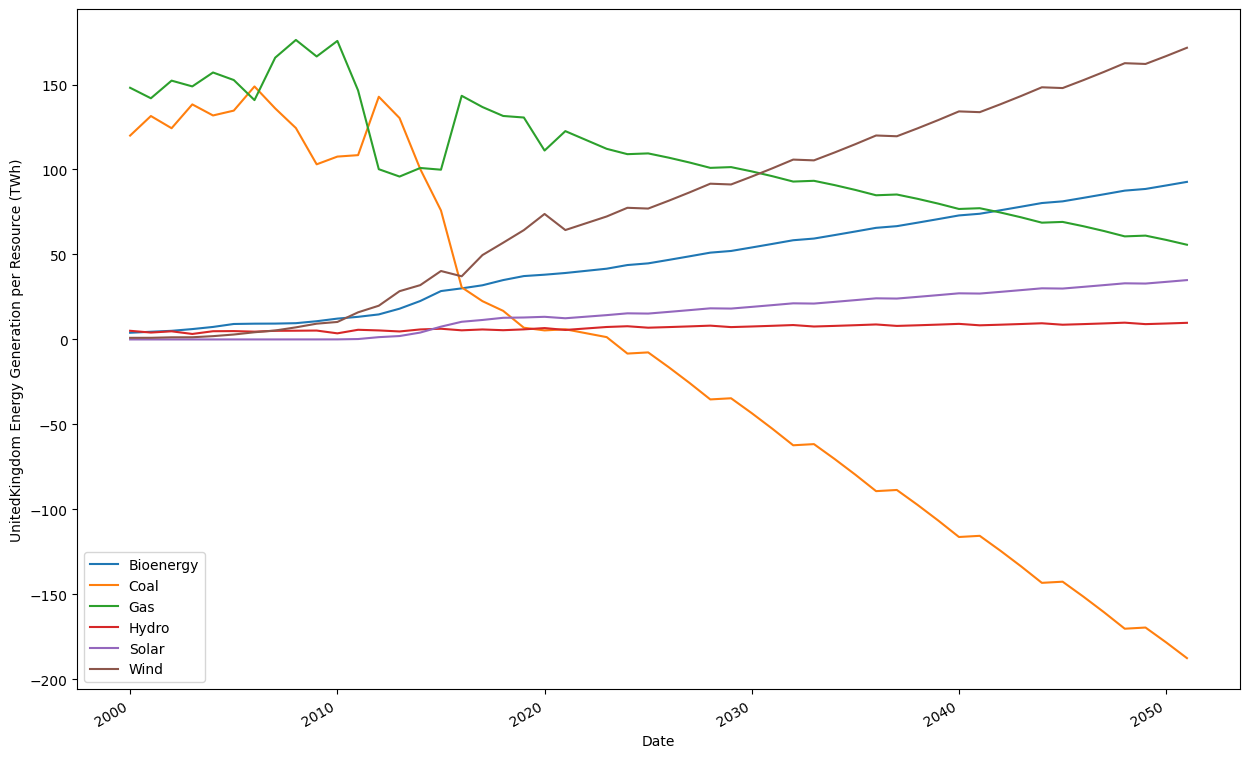

In [31]:
UnitedKingdomPlot = FullUnitedKingdomData.set_index('ds').plot(figsize=(15, 10))
UnitedKingdomPlot.set_ylabel('UnitedKingdom Energy Generation per Resource (TWh)')
UnitedKingdomPlot.set_xlabel('Date')  
plt.show()

In [32]:
UnitedKingdom_file_name = 'Predicted_UnitedKingdom_Dataset.xlsx'
FullUnitedKingdomData.to_excel(UnitedKingdom_file_name, index=False)